In [111]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import gmaps
from pygeocoder import Geocoder
import os
import scipy.stats as sps


In [ ]:
#Filtering down columns
#Disaster Decloration Summaries - disasterNumber, state, declarationType, fyDeclared, incidentType,  
#Hazard Mitigation Assistance Projects - disasterNumber, projectType, numberOfProperties, numberOfFinalProperties, projectAmount, federalShareObligated, benefitCostRatio, netValueBenefits
#Hazard Mitigation Grant Program Disaster Summaries - disasterNumber and obligatedTotalAmount

In [2]:
geo_codes = pd.read_csv('Geocodes_USA_with_Counties.csv')
geo_codes

,zip,primary_city,state,latitude,longitude,county,type,world_region,country,decommissioned,estimated_population,notes
0,501,Holtsville,NY,40.81,-73.04,Suffolk,UNIQUE,NaN,US,0,384,NaN
1,544,Holtsville,NY,40.81,-73.04,Suffolk,UNIQUE,NaN,US,0,0,NaN
2,601,Adjuntas,PR,18.16,-66.72,Adjuntas,STANDARD,NaN,US,0,0,NaN
3,602,Aguada,PR,18.38,-67.18,NaN,STANDARD,NaN,US,0,0,NaN
4,603,Aguadilla,PR,18.43,-67.15,Aguadilla,STANDARD,NaN,US,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
42517,99926,Metlakatla,AK,55.14,-131.49,Prince of Wales-Outer Ketchikan Borough,PO BOX,NaN,US,0,1018,NaN
42518,99927,Point Baker,AK,56.30,-133.57,Prince of Wales-Outer Ketchikan Borough,PO BOX,NaN,US,0,0,NaN
42519,99928,Ward Cove,AK,55.45,-131.79,Ketchikan Gateway Borough,PO BOX,NaN,US,0,1281,NaN
42520,99929,Wrangell,AK,55.95,-131.96,Wrangell Borough,PO BOX,NaN,US,0,1956,NaN


In [2]:
#Hazard Mitigation Assistance Projects - disasterNumber, projectType, numberOfProperties, numberOfFinalProperties, projectAmount, federalShareObligated, benefitCostRatio, netValueBenefits
haz_project = pd.read_csv('HazardMitigationAssistanceProjects.csv')
haz_project_clean = haz_project[['disasterNumber', 'projectType', 'numberOfProperties', 'numberOfFinalProperties', 'projectAmount', 'federalShareObligated', 'benefitCostRatio', 'netValueBenefits', 'projectIdentifier']]
haz_project_clean

,disasterNumber,projectType,numberOfProperties,numberOfFinalProperties,projectAmount,federalShareObligated,benefitCostRatio,netValueBenefits,projectIdentifier
0,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,5,4,31477.0,20086.0,1.371,21420.0,DR-1971-0561-R
1,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,4,4,19032.0,13650.0,1.371,21420.0,DR-1971-0428-R
2,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,0,769334.0,577000.0,4.460,3181553.0,DR-1971-0430-R
3,1971.0,601.1: Generators,0,0,42578.0,31934.0,0.000,0.0,DR-1971-0373-F
4,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,1,143899.0,107924.0,3.097,500916.0,DR-1971-0672-R
...,...,...,...,...,...,...,...,...,...
29191,NaN,700.1: Management Costs - Salaries,0,0,15000.0,11250.0,0.000,NaN,FMA-MC-08-CO-2019-002
29192,4086.0,202.2: Elevation of Private Structures - Coastal,3,1,46263.0,34626.0,0.000,0.0,DR-4086-0647-R
29193,4339.0,601.1: Generators,0,0,59885761.0,2503000.0,5.830,349133987.0,DR-4339-0016-R
29194,NaN,200.1: Acquisition of Private Real Property (S...,4,4,1246648.3,1246648.3,1.060,1321757.0,FMA-PJ-06-TX-2018-014


In [10]:
haz_project_state = haz_project[['state', 'disasterNumber', 'projectType', 'numberOfProperties', 'numberOfFinalProperties', 'projectAmount', 'federalShareObligated', 'benefitCostRatio', 'netValueBenefits', 'projectIdentifier']]
state_project = haz_project_state.dropna()
state_project

,state,disasterNumber,projectType,numberOfProperties,numberOfFinalProperties,projectAmount,federalShareObligated,benefitCostRatio,netValueBenefits,projectIdentifier
0,Alabama,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,5,4,31477.0,20086.00,1.371,21420.0,DR-1971-0561-R
1,Alabama,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,4,4,19032.0,13650.00,1.371,21420.0,DR-1971-0428-R
2,Alabama,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,0,769334.0,577000.00,4.460,3181553.0,DR-1971-0430-R
3,Alabama,1971.0,601.1: Generators,0,0,42578.0,31934.00,0.000,0.0,DR-1971-0373-F
4,Alabama,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,1,143899.0,107924.00,3.097,500916.0,DR-1971-0672-R
...,...,...,...,...,...,...,...,...,...,...
29187,Texas,5233.0,206.1: Safe Room (Tornado and Severe Wind Shel...,1,0,1890000.0,990000.00,1.400,229307.0,DR-5233-0011-R
29189,New Jersey,4086.0,602.1: Other Equipment Purchase and Installation,0,0,73430.0,66087.00,5.969,517419.0,DR-4086-0646-R
29190,Washington,4243.0,200.1: Acquisition of Private Real Property (S...,1,1,1535117.0,1151337.75,1.532,2351083.0,DR-4243-0009-R
29192,New Jersey,4086.0,202.2: Elevation of Private Structures - Coastal,3,1,46263.0,34626.00,0.000,0.0,DR-4086-0647-R


In [5]:
with_counties = pd.merge(geo_codes, county_project, on="county")
with_counties

,zip,primary_city,state_x,latitude,longitude,county,type,world_region,country,decommissioned,...,state_y,disasterNumber,projectType,numberOfProperties,numberOfFinalProperties,projectAmount,federalShareObligated,benefitCostRatio,netValueBenefits,projectIdentifier
0,501,Holtsville,NY,40.81,-73.04,Suffolk,UNIQUE,NaN,US,0,...,New York,1296.0,201.2: Relocation of Private Structures - Coas...,5,0,90685.0,68014.0,1.533,190869.0,DR-1296-0038-R
1,501,Holtsville,NY,40.81,-73.04,Suffolk,UNIQUE,NaN,US,0,...,New York,4020.0,800.1: Miscellaneous,1,0,7737.0,5803.0,1.000,1.0,DR-4020-0053-R
2,501,Holtsville,NY,40.81,-73.04,Suffolk,UNIQUE,NaN,US,0,...,New York,4085.0,403.2: Stormwater Management - Diversions,0,0,564000.0,564000.0,1.517,1067612.0,DR-4085-0010-R
3,501,Holtsville,NY,40.81,-73.04,Suffolk,UNIQUE,NaN,US,0,...,New York,1899.0,200.1: Acquisition of Private Real Property (S...,10,10,2291690.0,1718768.0,1.934,1094385.0,DR-1899-0016-R
4,501,Holtsville,NY,40.81,-73.04,Suffolk,UNIQUE,NaN,US,0,...,New York,1296.0,202.2: Elevation of Private Structures - Coastal,9,2,198574.0,148931.0,1.557,909233.0,DR-1296-0011-R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577400,99362,Walla Walla,WA,46.11,-118.30,Walla Walla,STANDARD,NaN,US,0,...,Washington,5182.0,601.2: Generators - Regular,0,0,51000.0,38250.0,2.013,140099.0,DR-5182-0020-R
1577401,99363,Wallula,WA,46.06,-118.89,Walla Walla,PO BOX,NaN,US,0,...,Washington,5090.0,91.5: Local Multijurisdictional Multihazard Mi...,0,0,41212.0,30909.0,0.000,0.0,DR-5090-0001-P
1577402,99363,Wallula,WA,46.06,-118.89,Walla Walla,PO BOX,NaN,US,0,...,Washington,1734.0,91.1: Local Multihazard Mitigation Plan,0,0,24693.0,18303.0,0.000,0.0,DR-1734-0020-P
1577403,99363,Wallula,WA,46.06,-118.89,Walla Walla,PO BOX,NaN,US,0,...,Washington,1100.0,200.1: Acquisition of Private Real Property (S...,17,17,1319010.0,989257.0,1.252,946118.0,DR-1100-0016-R


In [100]:
#Disaster Decloration Summaries - disasterNumber, state, declarationType, fyDeclared, incidentType,  
disaster_sum = pd.read_csv('DisasterDeclarationsSummaries.csv')
disaster_sum_clean = disaster_sum[['disasterNumber', 'state', 'declarationType', 'fyDeclared', 'incidentType']].drop_duplicates(subset="disasterNumber")
disaster_sum_clean

,disasterNumber,state,declarationType,fyDeclared,incidentType
0,1,GA,DR,1953,Tornado
1,4,MI,DR,1953,Tornado
2,3,LA,DR,1953,Flood
3,6,MI,DR,1953,Tornado
4,2,TX,DR,1953,Tornado
...,...,...,...,...,...
59392,3530,TX,EM,2020,Hurricane
59424,5323,WA,FM,2020,Fire
59426,3531,VI,EM,2020,Hurricane
59429,3532,PR,EM,2020,Hurricane


In [6]:
#Hazard Mitigation Assistance Projects - disasterNumber, projectType, numberOfProperties, numberOfFinalProperties, projectAmount, federalShareObligated, benefitCostRatio, netValueBenefits
# haz_project = pd.read_csv('HazardMitigationAssistanceProjects.csv')
# haz_project_clean = haz_project[['disasterNumber', 'projectType', 'numberOfProperties', 'numberOfFinalProperties', 'projectAmount', 'federalShareObligated', 'benefitCostRatio', 'netValueBenefits', 'projectIdentifier']].dropna()
# haz_project_clean

,disasterNumber,projectType,numberOfProperties,numberOfFinalProperties,projectAmount,federalShareObligated,benefitCostRatio,netValueBenefits,projectIdentifier
0,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,5,4,31477.0,20086.00,1.371,21420.0,DR-1971-0561-R
1,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,4,4,19032.0,13650.00,1.371,21420.0,DR-1971-0428-R
2,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,0,769334.0,577000.00,4.460,3181553.0,DR-1971-0430-R
3,1971.0,601.1: Generators,0,0,42578.0,31934.00,0.000,0.0,DR-1971-0373-F
4,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,1,143899.0,107924.00,3.097,500916.0,DR-1971-0672-R
...,...,...,...,...,...,...,...,...,...
29187,5233.0,206.1: Safe Room (Tornado and Severe Wind Shel...,1,0,1890000.0,990000.00,1.400,229307.0,DR-5233-0011-R
29189,4086.0,602.1: Other Equipment Purchase and Installation,0,0,73430.0,66087.00,5.969,517419.0,DR-4086-0646-R
29190,4243.0,200.1: Acquisition of Private Real Property (S...,1,1,1535117.0,1151337.75,1.532,2351083.0,DR-4243-0009-R
29192,4086.0,202.2: Elevation of Private Structures - Coastal,3,1,46263.0,34626.00,0.000,0.0,DR-4086-0647-R


In [101]:
disaster_projects = pd.merge(haz_project_clean, disaster_sum_clean, on='disasterNumber')
disaster_summary = disaster_projects.groupby(['state', 'incidentType', 'disasterNumber', 'projectIdentifier']).mean()
disaster_summary


,disasterNumber,projectType,numberOfProperties,numberOfFinalProperties,projectAmount,federalShareObligated,benefitCostRatio,netValueBenefits,projectIdentifier,state,declarationType,fyDeclared,incidentType
0,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,5,4,31477.0,20086.00,1.371,21420.0,DR-1971-0561-R,AL,DR,2011,Severe Storm(s)
1,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,4,4,19032.0,13650.00,1.371,21420.0,DR-1971-0428-R,AL,DR,2011,Severe Storm(s)
2,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,0,769334.0,577000.00,4.460,3181553.0,DR-1971-0430-R,AL,DR,2011,Severe Storm(s)
3,1971.0,601.1: Generators,0,0,42578.0,31934.00,0.000,0.0,DR-1971-0373-F,AL,DR,2011,Severe Storm(s)
4,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,1,143899.0,107924.00,3.097,500916.0,DR-1971-0672-R,AL,DR,2011,Severe Storm(s)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21559,4376.0,202.1: Elevation of Private Structures - Riverine,1,1,39653.0,29739.75,0.000,0.0,DR-4376-0005-R,MD,DR,2018,Flood
21560,4418.0,700.1: Management Costs - Salaries; \n700.4: M...,0,0,259476.0,259476.00,0.000,0.0,DR-4418-0001-M,WA,DR,2019,Severe Storm(s)
21561,4385.0,700.1: Management Costs - Salaries,0,0,352906.0,85633.00,0.000,0.0,DR-4385-0001-M,CT,DR,2018,Tornado
21562,4378.0,601.2: Generators - Regular,0,0,159560.0,119670.00,3.062,622162.0,DR-4378-0004-R,WV,DR,2018,Severe Storm(s)


In [30]:
disaster_sum_clean["incidentType"].value_counts()

Fire                1403
Severe Storm(s)      982
Flood                836
Hurricane            374
Tornado              170
Snow                 165
Biological           157
Severe Ice Storm      62
Typhoon               58
Drought               46
Earthquake            35
Coastal Storm         29
Other                 26
Freezing              18
Toxic Substances       8
Mud/Landslide          7
Dam/Levee Break        6
Fishing Losses         6
Volcano                6
Human Cause            4
Tsunami                3
Terrorist              2
Chemical               1
Name: incidentType, dtype: int64

In [19]:
storms_df = disaster_sum_clean[disaster_sum_clean["incidentType"] == "Severe Storm(s)"]
storms_df 

,disasterNumber,state,declarationType,fyDeclared,incidentType
60,136,OR,DR,1963,Severe Storm(s)
102,104,OK,DR,1960,Severe Storm(s)
130,58,PA,DR,1956,Severe Storm(s)
135,56,NC,DR,1956,Severe Storm(s)
147,61,PA,DR,1956,Severe Storm(s)
...,...,...,...,...,...
59192,4550,TN,DR,2020,Severe Storm(s)
59212,4551,MS,DR,2020,Severe Storm(s)
59222,4552,MO,DR,2020,Severe Storm(s)
59366,4554,AL,DR,2020,Severe Storm(s)


In [20]:
state_coords = pd.read_csv('state_lat_lng.csv')

lat_lng = pd.merge(state_coords, disaster_sum_clean, on='state')
lat_lng

,state,latitude,longitude,state_name,disasterNumber,declarationType,fyDeclared,incidentType
0,AK,63.588753,-154.493062,Alaska,13,DR,1954,Other
1,AK,63.588753,-154.493062,Alaska,31,DR,1955,Other
2,AK,63.588753,-154.493062,Alaska,46,DR,1956,Other
3,AK,63.588753,-154.493062,Alaska,168,DR,1964,Earthquake
4,AK,63.588753,-154.493062,Alaska,230,DR,1967,Flood
...,...,...,...,...,...,...,...,...
4283,WY,43.075968,-107.290284,Wyoming,5139,FM,2016,Fire
4284,WY,43.075968,-107.290284,Wyoming,5241,FM,2018,Fire
4285,WY,43.075968,-107.290284,Wyoming,5276,FM,2018,Fire
4286,WY,43.075968,-107.290284,Wyoming,3479,EM,2020,Biological


In [26]:
storms_merged = pd.merge(lat_lng, storms_df, on='disasterNumber')
storms_merged_clean = storms_merged.drop(columns=["state_y", "incidentType_y", "fyDeclared_y", "declarationType_y"])
storms_merged_clean = storms_merged_clean.rename(columns={"state_x" : "state_ID", "declarationType_x" : "declarationType",
                                    "fyDeclared_x" : "fyDeclared", "incidentType_x" : "incidentType"})
storms_merged_clean

,state_ID,latitude,longitude,state_name,disasterNumber,declarationType,fyDeclared,incidentType
0,AK,63.588753,-154.493062,Alaska,281,DR,1970,Severe Storm(s)
1,AK,63.588753,-154.493062,Alaska,1039,DR,1994,Severe Storm(s)
2,AK,63.588753,-154.493062,Alaska,1316,DR,2000,Severe Storm(s)
3,AK,63.588753,-154.493062,Alaska,1445,DR,2003,Severe Storm(s)
4,AK,63.588753,-154.493062,Alaska,1461,DR,2003,Severe Storm(s)
...,...,...,...,...,...,...,...,...
970,WV,38.597626,-80.454903,West Virginia,4331,DR,2017,Severe Storm(s)
971,WV,38.597626,-80.454903,West Virginia,4378,DR,2018,Severe Storm(s)
972,WY,43.075968,-107.290284,Wyoming,1351,DR,2001,Severe Storm(s)
973,WY,43.075968,-107.290284,Wyoming,4007,DR,2011,Severe Storm(s)


In [53]:
storm_projects = disaster_projects[disaster_projects["incidentType"] == "Severe Storm(s)"]
storm_projects

,disasterNumber,projectType,numberOfProperties,numberOfFinalProperties,projectAmount,federalShareObligated,benefitCostRatio,netValueBenefits,projectIdentifier,state,declarationType,fyDeclared,incidentType
0,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,5,4,31477.0,20086.0,1.371,21420.0,DR-1971-0561-R,AL,DR,2011,Severe Storm(s)
1,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,4,4,19032.0,13650.0,1.371,21420.0,DR-1971-0428-R,AL,DR,2011,Severe Storm(s)
2,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,0,769334.0,577000.0,4.460,3181553.0,DR-1971-0430-R,AL,DR,2011,Severe Storm(s)
3,1971.0,601.1: Generators,0,0,42578.0,31934.0,0.000,0.0,DR-1971-0373-F,AL,DR,2011,Severe Storm(s)
4,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,1,143899.0,107924.0,3.097,500916.0,DR-1971-0672-R,AL,DR,2011,Severe Storm(s)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21542,4423.0,700.1: Management Costs - Salaries; \n700.4: M...,0,0,40833.0,40833.0,0.000,0.0,DR-4423-0001-M,CA,DR,2019,Severe Storm(s)
21552,4479.0,700.1: Management Costs - Salaries; \n700.2: M...,0,0,36131.0,36131.0,0.000,0.0,DR-4479-0001-M,SC,DR,2020,Severe Storm(s)
21553,4542.0,700.1: Management Costs - Salaries; \n700.2: M...,0,0,46616.0,46616.0,0.000,0.0,DR-4542-0001-M,SC,DR,2020,Severe Storm(s)
21560,4418.0,700.1: Management Costs - Salaries; \n700.4: M...,0,0,259476.0,259476.0,0.000,0.0,DR-4418-0001-M,WA,DR,2019,Severe Storm(s)


In [57]:
storm_projects_group = storm_projects.groupby(["state", "disasterNumber", "projectIdentifier"]).mean()
storm_projects_group

numberOfProperties  \
state disasterNumber projectIdentifier                       
AK    1039.0         DR-1039-0002-R                     12   
                     DR-1039-0003-R                     27   
                     DR-1039-0004-R                      0   
                     DR-1039-M001-M                      0   
      1316.0         DR-1316-0001-R                     11   
...                                                    ...   
WY    4007.0         DR-4007-0007-R                      0   
                     DR-4007-0008-R                      0   
                     DR-4007-0009-R                      0   
      4306.0         DR-4306-0003-M                      0   
                     DR-4306-0004-R                      0   

                                        numberOfFinalProperties  \
state disasterNumber projectIdentifier                            
AK    1039.0         DR-1039-0002-R                          11   
                     DR-1039-0003-R                          27   
                     DR-1039-0004-R                           0   
                     DR-1039-M001-M                           0   
      1316.0         DR-1316-0001-R                          11   
...                                                         ...   
WY    4007.0         DR-4007-0007-R                           0   
                     DR-4007-0008-R                           0   
                     DR-4007-0009-R                           0   
      4306.0         DR-4306-0003-M                           0   
                     DR-4306-0004-R                           0   

                                        projectAmount  federalShareObligated  \
state disasterNumber projectIdentifier                                         
AK    1039.0         DR-1039-0002-R         8429993.0              6322495.0   
                     DR-1039-0003-R         1328065.0               919191.0   
                     DR-1039-0004-R          921989.0               691492.0   
                     DR-1039-M001-M          824824.0               618693.0   
      1316.0         DR-1316-0001-R          738920.0               554190.0   
...                                               ...                    ...   
WY    4007.0         DR-4007-0007-R           76113.0                57085.0   
                     DR-4007-0008-R         1217776.0               608003.0   
                     DR-4007-0009-R          151030.0               113273.0   
      4306.0         DR-4306-0003-M           17417.0                17417.0   
                     DR-4306-0004-R          127938.0                95953.5   

                                        benefitCostRatio  netValueBenefits  \
state disasterNumber projectIdentifier                                       
AK    1039.0         DR-1039-0002-R                1.516         7419336.0   
                     DR-1039-0003-R                1.291        10382364.0   
                     DR-1039-0004-R                1.063         1292236.0   
                     DR-1039-M001-M                0.000               0.0   
      1316.0         DR-1316-0001-R                5.924        10500000.0   
...                                                  ...               ...   
WY    4007.0         DR-4007-0007-R                2.508          250546.0   
                     DR-4007-0008-R                1.313         1598580.0   
                     DR-4007-0009-R                1.810          284957.0   
      4306.0         DR-4306-0003-M                0.000               0.0   
                     DR-4306-0004-R                6.222         2115692.0   

                                        fyDeclared  
state disasterNumber projectIdentifier              
AK    1039.0         DR-1039-0002-R           1994  
                     DR-1039-0003-R           1994  
                     DR-1039-0004-R           1994  
                     DR-1039-M001-M     

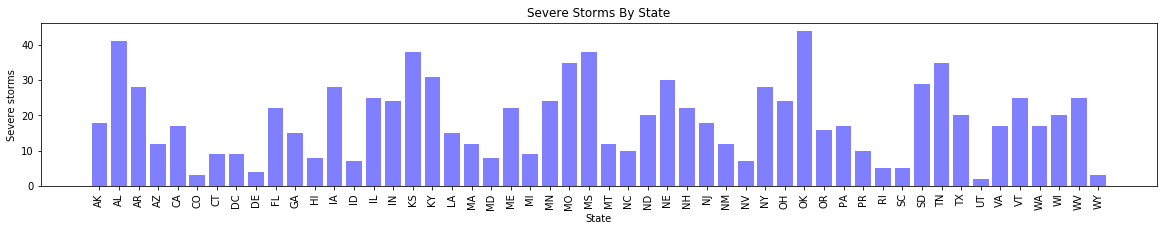

<Figure size 432x288 with 0 Axes>

In [58]:
number_storms = storms_merged_clean.groupby("state_ID")[["disasterNumber"]].count()
number_storms = number_storms.iloc[:,0]
x_axis = np.arange(len(number_storms))
tick_place = [value + 0.4 for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, number_storms, color="b", alpha=0.5, align="edge")
plt.xticks(tick_place, number_storms.index, rotation="vertical")
plt.title("Severe Storms By State")
plt.xlabel("State")
plt.ylabel("Severe storms")
plt.show()
plt.savefig("output_data/severe_storms_by_state.png")

In [105]:
#Hazard Mitigation Grant Program Disaster Summaries
hazard_sum = pd.read_csv('HazardMitigationGrantProgramDisasterSummaries.csv')
hazard_sum_clean = hazard_sum[['disasterNumber', 'obligatedTotalAmount']]
hazard_sum_clean

,disasterNumber,obligatedTotalAmount
0,1071,2834575.0
1,1337,782081.0
2,1326,333150.0
3,1506,1791043.0
4,1211,413384.0
...,...,...
1731,4551,0.0
1732,4556,0.0
1733,4553,0.0
1734,4554,0.0


In [109]:
state_funding = pd.merge(disaster_sum_clean, hazard_sum_clean, on="disasterNumber")
state_funding

,disasterNumber,state,declarationType,fyDeclared,incidentType,obligatedTotalAmount
0,820,UT,DR,1989,Flood,95048.0
1,821,KY,DR,1989,Flood,579052.0
2,824,MN,DR,1989,Flood,201496.0
3,823,TX,DR,1989,Flood,0.0
4,822,WA,DR,1989,Flood,221682.0
...,...,...,...,...,...,...
1731,4552,MO,DR,2020,Severe Storm(s),0.0
1732,4553,ND,DR,2020,Flood,0.0
1733,4556,AR,DR,2020,Tornado,0.0
1734,4554,AL,DR,2020,Severe Storm(s),0.0


In [60]:
storm_funding_sum = pd.merge(storms_merged_clean, hazard_sum_clean, on="disasterNumber")

storm_funding_sum

,state_ID,latitude,longitude,state_name,disasterNumber,declarationType,fyDeclared,incidentType,obligatedTotalAmount
0,AK,63.588753,-154.493062,Alaska,1039,DR,1994,Severe Storm(s),8719963.0
1,AK,63.588753,-154.493062,Alaska,1316,DR,2000,Severe Storm(s),1583458.0
2,AK,63.588753,-154.493062,Alaska,1445,DR,2003,Severe Storm(s),1695298.0
3,AK,63.588753,-154.493062,Alaska,1461,DR,2003,Severe Storm(s),203999.0
4,AK,63.588753,-154.493062,Alaska,1571,DR,2005,Severe Storm(s),464357.0
...,...,...,...,...,...,...,...,...,...
888,WV,38.597626,-80.454903,West Virginia,4331,DR,2017,Severe Storm(s),2482313.2
889,WV,38.597626,-80.454903,West Virginia,4378,DR,2018,Severe Storm(s),127648.0
890,WY,43.075968,-107.290284,Wyoming,1351,DR,2001,Severe Storm(s),98588.0
891,WY,43.075968,-107.290284,Wyoming,4007,DR,2011,Severe Storm(s),816983.0


In [61]:
storm_funds = pd.merge(storms_df, hazard_sum_clean, on="disasterNumber")
storm_funds

,disasterNumber,state,declarationType,fyDeclared,incidentType,obligatedTotalAmount
0,828,TX,DR,1989,Severe Storm(s),1318742.0
1,838,DC,DR,1989,Severe Storm(s),37400.0
2,839,MD,DR,1989,Severe Storm(s),35435.0
3,856,AL,DR,1990,Severe Storm(s),352454.0
4,857,GA,DR,1990,Severe Storm(s),796538.0
...,...,...,...,...,...,...
895,4550,TN,DR,2020,Severe Storm(s),0.0
896,4551,MS,DR,2020,Severe Storm(s),0.0
897,4552,MO,DR,2020,Severe Storm(s),0.0
898,4554,AL,DR,2020,Severe Storm(s),0.0


In [76]:
storm_funds[disaster_funds["state"] == "IA"].sum()

disasterNumber                                                      72150
state                   IAIAIAIAIAIAIAIAIAIAIAIAIAIAIAIAIAIAIAIAIAIAIA...
declarationType         DRDRDRDRDRDRDRDRDRDRDRDRDRDRDRDRDRDRDRDRDRDRDR...
fyDeclared                                                          54241
incidentType            Severe Storm(s)Severe Storm(s)Severe Storm(s)S...
obligatedTotalAmount                                          3.59639e+08
dtype: object

In [118]:
project_funds = storm_funding_sum.groupby(['state_ID', 'disasterNumber', 'projectIdentifier']).mean()
project_funds

KeyError: 'projectIdentifier'

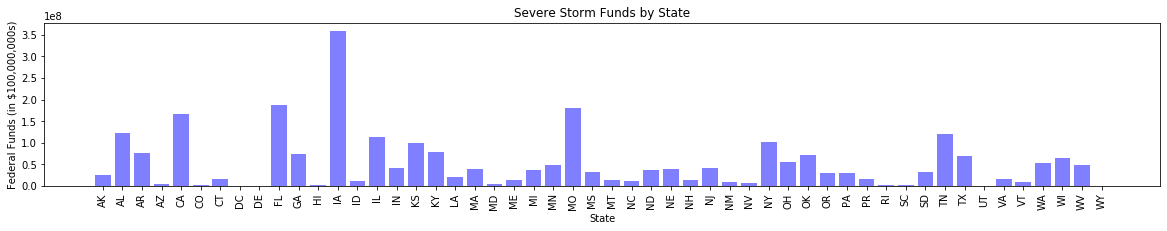

<Figure size 432x288 with 0 Axes>

In [62]:
storm_funds_amt = storm_funding_sum.groupby("state_ID")[["obligatedTotalAmount"]].sum()
storm_funds_amt = storm_funds_amt.iloc[:,0]
x_axis = np.arange(len(storm_funds_amt))
tick_place = [value + 0.4 for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, storm_funds_amt, color="b", alpha=0.5, align="edge")
plt.xticks(tick_place, storm_funds_amt.index, rotation="vertical")
plt.title("Severe Storm Funds by State")
plt.xlabel("State")
plt.ylabel("Federal Funds (in $100,000,000s)")
plt.show()
plt.savefig("output_data/storm_funding_by_state.png")

In [80]:
il = disaster_funds[disaster_funds["state"] == "I"]
ia["obligatedTotalAmount"].sum()

359639213.55999994

In [43]:
al = funding_sum[funding_sum["state_x"] == "Alabama"]
al

,state_x,county,disasterNumber,projectType,numberOfProperties,numberOfFinalProperties,projectAmount,federalShareObligated,benefitCostRatio,netValueBenefits,projectIdentifier,state_y,declarationType,fyDeclared,incidentType,obligatedTotalAmount
0,Alabama,Morgan,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,5,4,31477.0,20086.0,1.371,21420.0,DR-1971-0561-R,AL,DR,2011,Severe Storm(s),71893494.25
1,Alabama,St. Clair,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,4,4,19032.0,13650.0,1.371,21420.0,DR-1971-0428-R,AL,DR,2011,Severe Storm(s),71893494.25
2,Alabama,Jefferson,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,0,769334.0,577000.0,4.460,3181553.0,DR-1971-0430-R,AL,DR,2011,Severe Storm(s),71893494.25
3,Alabama,Franklin,1971.0,601.1: Generators,0,0,42578.0,31934.0,0.000,0.0,DR-1971-0373-F,AL,DR,2011,Severe Storm(s),71893494.25
4,Alabama,Cullman,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,1,143899.0,107924.0,3.097,500916.0,DR-1971-0672-R,AL,DR,2011,Severe Storm(s),71893494.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8805,Alabama,Etowah,1797.0,206.2: Safe Room (Tornado and Severe Wind Shel...,3,3,93908.0,70431.0,1.451,78724.0,DR-1797-0008-R,AL,DR,2008,Severe Storm(s),1905215.00
8806,Alabama,DeKalb,1797.0,600.1: Warning Systems (as a Component of a Pl...,0,0,135345.0,101509.0,0.000,0.0,DR-1797-0002-F,AL,DR,2008,Severe Storm(s),1905215.00
8807,Alabama,Statewide,1797.0,700.1: Management Costs - Salaries; \n700.2: M...,0,0,102055.0,102055.0,0.000,0.0,DR-1797-0010-M,AL,DR,2008,Severe Storm(s),1905215.00
8808,Alabama,Morgan,1797.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,1,79488.0,59616.0,5.692,523121.0,DR-1797-0003-R,AL,DR,2008,Severe Storm(s),1905215.00


In [56]:
il["obligatedTotalAmount"].sum()

2461749171.61

In [45]:
al["obligatedTotalAmount"].sum()

49043502494.5

In [52]:
no_al = funding_sum[funding_sum["state_x"] != "Alabama"]
no_al_il = no_al[no_al["state_x"] != "Illinois"]
no_al_il

,state_x,county,disasterNumber,projectType,numberOfProperties,numberOfFinalProperties,projectAmount,federalShareObligated,benefitCostRatio,netValueBenefits,projectIdentifier,state_y,declarationType,fyDeclared,incidentType,obligatedTotalAmount
670,Mississippi,Quitman,1972.0,601.1: Generators,0,0,32342.0,24257.0,0.000,0.0,DR-1972-0007-F,MS,DR,2011,Severe Storm(s),2809443.0
671,Mississippi,Adams,1972.0,202.3: Elevation of Public Structures - Riverine,1,1,78059.0,52725.0,6.731,519639.0,DR-1972-0019-R,MS,DR,2011,Severe Storm(s),2809443.0
672,Mississippi,Monroe,1972.0,601.1: Generators,0,0,57922.0,43442.0,0.000,0.0,DR-1972-0029-F,MS,DR,2011,Severe Storm(s),2809443.0
673,Mississippi,Simpson,1972.0,601.1: Generators,0,0,40690.0,28773.0,0.000,0.0,DR-1972-0016-F,MS,DR,2011,Severe Storm(s),2809443.0
674,Mississippi,Scott,1972.0,600.1: Warning Systems (as a Component of a Pl...,0,0,98244.0,73683.0,0.000,0.0,DR-1972-0014-F,MS,DR,2011,Severe Storm(s),2809443.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8963,California,Riverside,4423.0,700.1: Management Costs - Salaries; \n700.4: M...,0,0,40833.0,40833.0,0.000,0.0,DR-4423-0001-M,CA,DR,2019,Severe Storm(s),40833.0
8964,South Carolina,Statewide,4479.0,700.1: Management Costs - Salaries; \n700.2: M...,0,0,36131.0,36131.0,0.000,0.0,DR-4479-0001-M,SC,DR,2020,Severe Storm(s),36131.0
8965,South Carolina,Statewide,4542.0,700.1: Management Costs - Salaries; \n700.2: M...,0,0,46616.0,46616.0,0.000,0.0,DR-4542-0001-M,SC,DR,2020,Severe Storm(s),46616.0
8966,Washington,Statewide,4418.0,700.1: Management Costs - Salaries; \n700.4: M...,0,0,259476.0,259476.0,0.000,0.0,DR-4418-0001-M,WA,DR,2019,Severe Storm(s),259476.0


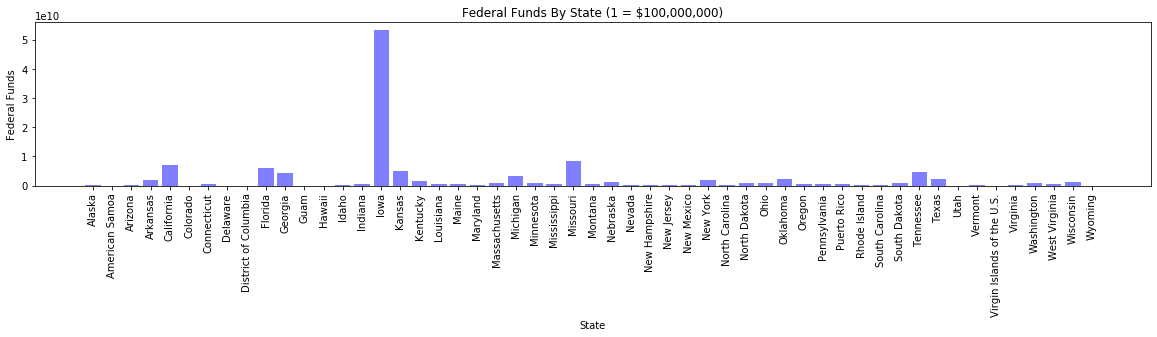

In [53]:
# no_al_il_funds = no_al_il.groupby("state_x")[["obligatedTotalAmount"]].sum()
# no_al_il_funds = no_al_il_funds.iloc[:,0]
# x_axis = np.arange(len(no_al_il_funds))
# tick_place = [value + 0.4 for value in x_axis]
# plt.figure(figsize=(20,3))
# plt.bar(x_axis, no_al_il_funds, color="b", alpha=0.5, align="edge")
# plt.xticks(tick_place, no_al_il_funds.index, rotation="vertical")
# plt.title("Federal Funds By State")
# plt.xlabel("State")
# plt.ylabel("Federal Funds (in $100,000,000s)")
# plt.show()


In [ ]:
alaska = funding_sum[funding_sum["state_x"] == "Alaska"]
alaska["obligatedTotalAmount"].sum()

In [ ]:
location = [["lat", "lng"]].astype(float)

In [55]:
ia = funding_sum[funding_sum["state_x"] == "Iowa"]
ia["obligatedTotalAmount"].sum()

53257473525.880005

In [ ]:
haz_project_clean[]

In [ ]:
location = geo_codes_clean[["latitude", "longitude"]].astype(float)

In [ ]:

# maps_url = ("https://maps.googleapis.com/maps/api/geocode/json?"
#                 'address={0}&key={1}').format(target_city, gkey)

# fig = gmaps.figure()

# heatmap_layer = gmaps.heatmap_layer(location, weights=humidity, 
#                                     dissipating=False, max_intensity=100, point_radius = 1)

# fig.add_layer(heatmap_layer)
# fig

In [63]:
huri_df = disaster_sum_clean[disaster_sum_clean["incidentType"] == "Hurricane"]
huri_df

,disasterNumber,state,declarationType,fyDeclared,incidentType
19,23,RI,DR,1954,Hurricane
21,22,MA,DR,1954,Hurricane
22,26,NY,DR,1955,Hurricane
23,24,ME,DR,1954,Hurricane
24,28,NC,DR,1955,Hurricane
...,...,...,...,...,...
59388,3529,HI,EM,2020,Hurricane
59392,3530,TX,EM,2020,Hurricane
59426,3531,VI,EM,2020,Hurricane
59429,3532,PR,EM,2020,Hurricane


In [117]:
state_counts = huri_df.groupby("state")[["disasterNumber"]].count()
state_counts.sortby_values(ascending=False)

AttributeError: 'DataFrame' object has no attribute 'sortby_values'

In [75]:
huri_merged = pd.merge(lat_lng, huri_df, on='disasterNumber')
huri_merged_clean = huri_merged.drop(columns=["state_y", "incidentType_y", "fyDeclared_y", "declarationType_y"])
huri_merged_clean = huri_merged_clean.rename(columns={"state_x" : "state_ID", "declarationType_x" : "declarationType",
                                    "fyDeclared_x" : "fyDeclared", "incidentType_x" : "incidentType"})
huri_merged_clean

,state_ID,latitude,longitude,state_name,disasterNumber,declarationType,fyDeclared,incidentType
0,AL,32.318231,-86.902298,Alabama,280,DR,1970,Hurricane
1,AL,32.318231,-86.902298,Alabama,598,DR,1979,Hurricane
2,AL,32.318231,-86.902298,Alabama,742,DR,1985,Hurricane
3,AL,32.318231,-86.902298,Alabama,1070,DR,1996,Hurricane
4,AL,32.318231,-86.902298,Alabama,1250,DR,1998,Hurricane
...,...,...,...,...,...,...,...,...
346,WV,38.597626,-80.454903,West Virginia,278,DR,1969,Hurricane
347,WV,38.597626,-80.454903,West Virginia,1496,DR,2003,Hurricane
348,WV,38.597626,-80.454903,West Virginia,3221,EM,2005,Hurricane
349,WV,38.597626,-80.454903,West Virginia,3358,EM,2013,Hurricane


In [94]:
huri_projects = pd.merge(huri_merged_clean, haz_project_clean, on="disasterNumber" )
huri_projects

,state_ID,latitude,longitude,state_name,disasterNumber,declarationType,fyDeclared,incidentType,projectType,numberOfProperties,numberOfFinalProperties,projectAmount,federalShareObligated,benefitCostRatio,netValueBenefits,projectIdentifier
0,AL,32.318231,-86.902298,Alabama,1070,DR,1996,Hurricane,200.1: Acquisition of Private Real Property (S...,29,29,204823.0,82917.0,1.424,1190674.0,DR-1070-0018-R
1,AL,32.318231,-86.902298,Alabama,1070,DR,1996,Hurricane,403.1: Stormwater Management - Culverts,0,0,125183.0,93887.0,2.144,297878.0,DR-1070-0024-R
2,AL,32.318231,-86.902298,Alabama,1070,DR,1996,Hurricane,200.1: Acquisition of Private Real Property (S...,4,4,609088.0,456816.0,0.000,0.0,DR-1070-0019-R
3,AL,32.318231,-86.902298,Alabama,1070,DR,1996,Hurricane,202.1: Elevation of Private Structures - Riverine,8,8,456965.0,343172.0,2.056,936409.0,DR-1070-0016-R
4,AL,32.318231,-86.902298,Alabama,1070,DR,1996,Hurricane,600.1: Warning Systems (as a Component of a Pl...,0,0,445362.0,334051.0,0.000,0.0,DR-1070-0013-F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5605,WV,38.597626,-80.454903,West Virginia,4093,DR,2013,Hurricane,91.1: Local Multihazard Mitigation Plan,0,0,50900.0,38175.0,0.000,0.0,DR-4093-0006-P
5606,WV,38.597626,-80.454903,West Virginia,4093,DR,2013,Hurricane,200.1: Acquisition of Private Real Property (S...,4,4,810162.0,607622.0,1.009,817170.0,DR-4093-0001-R
5607,WV,38.597626,-80.454903,West Virginia,4093,DR,2013,Hurricane,200.1: Acquisition of Private Real Property (S...,4,4,465350.0,349012.0,1.052,489455.0,DR-4093-0003-R
5608,WV,38.597626,-80.454903,West Virginia,4093,DR,2013,Hurricane,200.1: Acquisition of Private Real Property (S...,6,6,602384.0,451788.0,1.526,919305.0,DR-4093-0004-R


In [78]:
huri_summary = huri_projects.groupby(['state_ID', 'disasterNumber', 'projectType', 'projectIdentifier' ]).mean()
huri_summary

latitude  \
state_ID disasterNumber projectType                                        projectIdentifier              
AL       1070           200.1: Acquisition of Private Real Property (St... DR-1070-0003-R     32.318231   
                                                                           DR-1070-0004-R     32.318231   
                                                                           DR-1070-0010-R     32.318231   
                                                                           DR-1070-0015-R     32.318231   
                                                                           DR-1070-0018-R     32.318231   
...                                                                                                 ...   
WV       4093           200.1: Acquisition of Private Real Property (St... DR-4093-0003-R     38.597626   
                                                                           DR-4093-0004-R     38.597626   
                                                                           DR-4093-0005-R     38.597626   
                        601.1: Generators                                  DR-4093-0007-F     38.597626   
                        91.1: Local Multihazard Mitigation Plan            DR-4093-0006-P     38.597626   

                                                                                              longitude  \
state_ID disasterNumber projectType                                        projectIdentifier              
AL       1070           200.1: Acquisition of Private Real Property (St... DR-1070-0003-R    -86.902298   
                                                                           DR-1070-0004-R    -86.902298   
                                                                           DR-1070-0010-R    -86.902298   
                                                                           DR-1070-0015-R    -86.902298   
                                                                           DR-1070-0018-R    -86.902298   
...                                                                                                 ...   
WV       4093           200.1: Acquisition of Private Real Property (St... DR-4093-0003-R    -80.454903   
                                                                           DR-4093-0004-R    -80.454903   
                                                                           DR-4093-0005-R    -80.454903   
                        601.1: Generators                                  DR-4093-0007-F    -80.454903   
                        91.1: Local Multihazard Mitigation Plan            DR-4093-0006-P    -80.454903   

                                                                                              fyDeclared  \
state_ID disasterNumber projectType                                        projectIdentifier               
AL       1070           200.1: Acquisition of Private Real Property (St... DR-1070-0003-R           1996   
                                                                           DR-1070-0004-R           1996   
                                                                           DR-1070-0010-R           1996   
                                                                           DR-1070-0015-R           1996   
                                                                           DR-1070-0018-R           1996   
...                                                                                                  ...   
WV       4093           200.1: Acquisition of Private Real Property (St... DR-4093-0003-R           2013   
                                                                           DR-4093-0004-R           2013   
                                                                           DR-4093-0005-R           2013   
                        601.1: Generators                                  DR-4093-0007-F           2013   
               

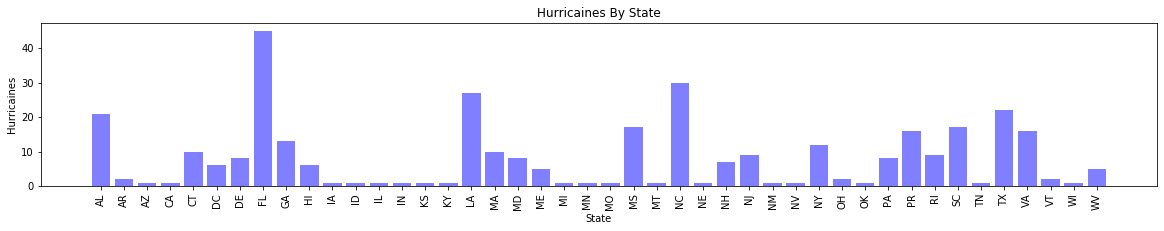

<Figure size 432x288 with 0 Axes>

In [79]:
number_huri = huri_merged_clean.groupby("state_ID")[["disasterNumber"]].count()
number_huri = number_huri.iloc[:,0]
x_axis = np.arange(len(number_huri))
tick_place = [value + 0.4 for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, number_huri, color="b", alpha=0.5, align="edge")
plt.xticks(tick_place, number_huri.index, rotation="vertical")
plt.title("Hurricaines By State")
plt.xlabel("State")
plt.ylabel("Hurricaines")
plt.show()
plt.savefig("output_data/hurricaines_by_state.png")

In [95]:
hazard_sum_clean

,disasterNumber,obligatedTotalAmount
0,1071,2834575.0
1,1337,782081.0
2,1326,333150.0
3,1506,1791043.0
4,1211,413384.0
...,...,...
1731,4551,0.0
1732,4556,0.0
1733,4553,0.0
1734,4554,0.0


In [93]:
huri_funds = pd.merge(huri_merged_clean, hazard_sum_clean, on="disasterNumber")
#funding_sum = funding_sum.drop_duplicates(subset=["disasterNumber", "projectIdentifier"], keep=False)
huri_funds


,state_ID,latitude,longitude,state_name,disasterNumber,declarationType,fyDeclared,incidentType,obligatedTotalAmount
0,AL,32.318231,-86.902298,Alabama,1070,DR,1996,Hurricane,6427682.00
1,AL,32.318231,-86.902298,Alabama,1250,DR,1998,Hurricane,6689836.00
2,AL,32.318231,-86.902298,Alabama,1438,DR,2003,Hurricane,716877.00
3,AL,32.318231,-86.902298,Alabama,1549,DR,2004,Hurricane,37574846.00
4,AL,32.318231,-86.902298,Alabama,1593,DR,2005,Hurricane,992916.00
...,...,...,...,...,...,...,...,...,...
152,VA,37.431573,-78.656894,Virginia,4411,DR,2019,Hurricane,2589790.25
153,VA,37.431573,-78.656894,Virginia,4401,DR,2019,Hurricane,1177456.75
154,VT,44.558803,-72.577841,Vermont,4022,DR,2011,Hurricane,29613730.78
155,WV,38.597626,-80.454903,West Virginia,1496,DR,2003,Hurricane,0.00


,state_ID_x,latitude_x,longitude_x,state_name_x,disasterNumber,declarationType_x,fyDeclared_x,incidentType_x,projectType,numberOfProperties,...,netValueBenefits,projectIdentifier,state_ID_y,latitude_y,longitude_y,state_name_y,declarationType_y,fyDeclared_y,incidentType_y,obligatedTotalAmount
0,AL,32.318231,-86.902298,Alabama,1070,DR,1996,Hurricane,200.1: Acquisition of Private Real Property (S...,29,...,1190674.0,DR-1070-0018-R,AL,32.318231,-86.902298,Alabama,DR,1996,Hurricane,6427682.0
1,AL,32.318231,-86.902298,Alabama,1070,DR,1996,Hurricane,403.1: Stormwater Management - Culverts,0,...,297878.0,DR-1070-0024-R,AL,32.318231,-86.902298,Alabama,DR,1996,Hurricane,6427682.0
2,AL,32.318231,-86.902298,Alabama,1070,DR,1996,Hurricane,200.1: Acquisition of Private Real Property (S...,4,...,0.0,DR-1070-0019-R,AL,32.318231,-86.902298,Alabama,DR,1996,Hurricane,6427682.0
3,AL,32.318231,-86.902298,Alabama,1070,DR,1996,Hurricane,202.1: Elevation of Private Structures - Riverine,8,...,936409.0,DR-1070-0016-R,AL,32.318231,-86.902298,Alabama,DR,1996,Hurricane,6427682.0
4,AL,32.318231,-86.902298,Alabama,1070,DR,1996,Hurricane,600.1: Warning Systems (as a Component of a Pl...,0,...,0.0,DR-1070-0013-F,AL,32.318231,-86.902298,Alabama,DR,1996,Hurricane,6427682.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5605,WV,38.597626,-80.454903,West Virginia,4093,DR,2013,Hurricane,91.1: Local Multihazard Mitigation Plan,0,...,0.0,DR-4093-0006-P,WV,38.597626,-80.454903,West Virginia,DR,2013,Hurricane,2253069.0
5606,WV,38.597626,-80.454903,West Virginia,4093,DR,2013,Hurricane,200.1: Acquisition of Private Real Property (S...,4,...,817170.0,DR-4093-0001-R,WV,38.597626,-80.454903,West Virginia,DR,2013,Hurricane,2253069.0
5607,WV,38.597626,-80.454903,West Virginia,4093,DR,2013,Hurricane,200.1: Acquisition of Private Real Property (S...,4,...,489455.0,DR-4093-0003-R,WV,38.597626,-80.454903,West Virginia,DR,2013,Hurricane,2253069.0
5608,WV,38.597626,-80.454903,West Virginia,4093,DR,2013,Hurricane,200.1: Acquisition of Private Real Property (S...,6,...,919305.0,DR-4093-0004-R,WV,38.597626,-80.454903,West Virginia,DR,2013,Hurricane,2253069.0


In [82]:
huri_project_funds = huri_funds.groupby(['state_ID', 'disasterNumber', 'projectType', 'projectIdentifier']).mean()
huri_project_funds

KeyError: 'projectType'

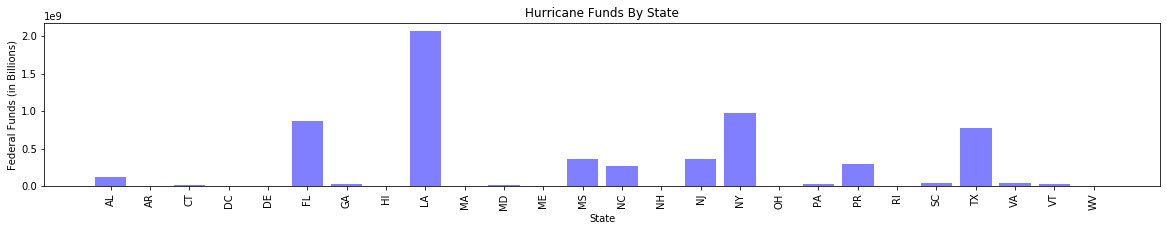

<Figure size 432x288 with 0 Axes>

In [91]:
huri_number_funds = huri_funds.groupby("state_ID")[["obligatedTotalAmount"]].sum()
huri_number_funds = huri_number_funds.iloc[:,0]
x_axis = np.arange(len(huri_number_funds))
tick_place = [value + 0.4 for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, huri_number_funds, color="b", alpha=0.5, align="edge")
plt.xticks(tick_place, huri_number_funds.index, rotation="vertical")
plt.title("Hurricane Funds By State")
plt.xlabel("State")
plt.ylabel("Federal Funds (in Billions)")
plt.show()
plt.savefig("output_data/hurricane_funds_by_state.png")

In [113]:
state_funds = state_funding.groupby("state")[["obligatedTotalAmount"]].sum()
state_disasters = state_funding.groupby("state")[["disasterNumber"]].count()

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(state_disasters, state_funds)
regress_values = state_disasters * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.scatter(state_disasters, state_funds)
plt.plot(lats, regress_values, "r-")
plt.annotate(line_eq,(-15, 40),fontsize=15,color="red")
# plt.xlabel("lattitude")
# plt.ylabel("max temp (f)")
# plt.title(f"lattitude vs max_temp ({date})")
# plt.savefig("output_data/lattitude_vs_max_temp.png")

ValueError: too many values to unpack (expected 4)

In [89]:
ia = huri_funds[huri_funds["state"] == "LA"]
ia["obligatedTotalAmount"].sum()

2072859527.52